In [46]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_text 
from sklearn.tree import plot_tree 
from  sklearn.impute import SimpleImputer 
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier ,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
path = "youth_data.csv" 
d = pd.read_csv(path) 
print(d.columns)

Index(['iralcfy', 'irmjfy', 'Cigarette_Frequency_Month', 'IRSMKLSS30N',
       'Alcohol_Frequency_Month', 'Marijuana_Frequency_Month', 'ircigage',
       'Smokeless_Tobacco_Frequency_Month', 'Alcohol_Age_First_Use',
       'Marijuana_Age_First_Use', 'Marijuana_Flag', 'Alcohol_Flag',
       'Tobacco_Flag', 'alcydays', 'mrjydays', 'Alcohol_Days', 'mrjmdays',
       'cigmdays', 'smklsmdays', 'School_Feelings', 'Teacher_Recognition',
       'Average_Grade', 'stndscig', 'Students_Using_Marijuana', 'stndalc',
       'stnddnk', 'Parents_Checking_Homework', 'parhlphw', 'PRCHORE2',
       'PRLMTTV2', 'parlmtsn', 'PRGDJOB2', 'PRPROUD2', 'Argue_with_Parent',
       'Youth_Fight_School', 'Youth_Group_Fight', 'Youth_Carry_Gun',
       'Youth_Sell_Drugs', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2',
       'Parents_Marijuana_View', 'prmjmo', 'PRALDLY2', 'YFLPKCG2',
       'Peer_Marijuana_View', 'Peer_Marijuana_Monthly', 'YFLADLY2', 'FRDPCIG2',
       'Friends_Marijuana_View', 'Friends_Marijuana_Monthly', 'FR

In [4]:
def imp(d): 
    return d.mode().iloc[0] 
for col in d.columns: 
    imp_v=imp(d[col]) 
    d[col].fillna(imp_v,inplace=True) 
n_after=d.isnull().sum() 
columns_after_replace=sum(n_after>0) 
print(columns_after_replace)

0


## Renaming the columns

In [5]:
column_mapping = { 
'iralcfy':'Alcohol_frequency', 
'irmjfy':'Marijuana_freuency', 
'mrjflag': 'Marijuana_Use_Flag', 
'alcflag': 'Alcohol_Use_Flag', 
'tobflag': 'Tobacco_Use_Flag', 
'mrjydays': 'Marijuana_Days_Last_Year', 
'schfelt': 'Feelings_About_School', 
'tchgjob': 'Teacher_Job_Performance', 
'stndscig': 'Cigarette_Standard', 
'stndalc': 'Alcohol_Standard', 
'stnddnk': 'Drinking_Standard', 
'parchkhw': 'Parents_Check_Homework', 
'PRCHORE2': 'Parental_Restrictions_Chores', 
'PRLMTTV2': 'Limiting_TV_Time', 
'parlmtsn': 'Limitations_Snacks', 
'FRDPCIG2': 'Friends_Cigarette_Use', 
'FRDMEVR2': 'Friends_Ever_Marijuana_Use', 
'PREVIOL2': 'Previous_Violence', 
'PRVDRGO2': 'Parental_Encouragement_Do_Good', 
'irsex': 'Respondent_Sex', 
'NEWRACE2': 'Race', 
'imother': 'Presence_Mother', 
'ifather': 'Presence_Father', 
'income': 'Income_Level', 
'POVERTY3': 'Poverty_Status', 
'COUTYP4': 'County_Type' 
}

In [6]:
d.rename(columns=column_mapping, inplace=True) 
d.columns 

Index(['Alcohol_frequency', 'Marijuana_freuency', 'Cigarette_Frequency_Month',
       'IRSMKLSS30N', 'Alcohol_Frequency_Month', 'Marijuana_Frequency_Month',
       'ircigage', 'Smokeless_Tobacco_Frequency_Month',
       'Alcohol_Age_First_Use', 'Marijuana_Age_First_Use', 'Marijuana_Flag',
       'Alcohol_Flag', 'Tobacco_Flag', 'alcydays', 'Marijuana_Days_Last_Year',
       'Alcohol_Days', 'mrjmdays', 'cigmdays', 'smklsmdays', 'School_Feelings',
       'Teacher_Recognition', 'Average_Grade', 'Cigarette_Standard',
       'Students_Using_Marijuana', 'Alcohol_Standard', 'Drinking_Standard',
       'Parents_Checking_Homework', 'parhlphw', 'Parental_Restrictions_Chores',
       'Limiting_TV_Time', 'Limitations_Snacks', 'PRGDJOB2', 'PRPROUD2',
       'Argue_with_Parent', 'Youth_Fight_School', 'Youth_Group_Fight',
       'Youth_Carry_Gun', 'Youth_Sell_Drugs', 'YOSTOLE2', 'YOATTAK2',
       'PRPKCIG2', 'Parents_Marijuana_View', 'prmjmo', 'PRALDLY2', 'YFLPKCG2',
       'Peer_Marijuana_View', 'Pe

In [9]:
for column in d.columns: 
    unique_values = d[column].unique() 
    print(f"'{column}': {unique_values}") 


'Alcohol_frequency': [993 991   3  12  36   1   2  28   8  52 132  24 120   4 156   7   5  48
 180  43   6 104  10  96  15  69  21  25  18  60  17   9  40  22  14  39
  72  84  20  30  19  26 144 240 145 204 276 260  61  45  33  13  32  11
  47 108  29  54  75 208  58 216  41  23  59  34 181  16  35  27  42  50
  82]
'Marijuana_freuency': [991 993 228   3  52  30   2 168 312  15 208   1   7 120 260  59  16  18
 180  50 364   4  12 156  20  24 100  36  41  13  17  48   9 183 252   5
   8 150 142  60 240  25  47  14 225   6 104 363  43  38  23 126  32 152
  22  10  19  80  44  96  35  72  40 344 276  45 250 336  58  84 144 194
 300 327 107  11  68 151 345 117  27 148  56  34]
'Cigarette_Frequency_Month': [91 93  1  3  2  4  6 22 10 25 20 30  5  8 26]
'IRSMKLSS30N': [91 93  1  5 10  4  7  2 12  3 25 20]
'Alcohol_Frequency_Month': [93.  91.   1.   4.   2.   3.   6.   1.5 10.   5.   7.  14.   8.  23.
 13.   9.  18.  15.  20.  11. ]
'Marijuana_Frequency_Month': [91.  93.   1.  12.  20.  14.5

# Binary Classification

In [ ]:
features = ['Father_Presence','Overall_Health','Gender', 
'Friends_religious_beliefs','School_Feelings', 'Parental_Restrictions_Chores','Average_Grade'] 
X = d[features] 
y = d['Marijuana_Flag'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Decision Tree Classifier

In [12]:
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
dt_model = DecisionTreeClassifier(random_state=42) 
dt_scores = cross_val_score(dt_model, X, y, cv=5) 
print("\nDecision Tree Cross-validation scores:", dt_scores) 
print("Mean Cross-validation accuracy - Decision Tree:", dt_scores.mean()) 


Decision Tree Cross-validation scores: [0.85997522 0.85625774 0.85359801 0.8573201  0.85980149]
Mean Cross-validation accuracy - Decision Tree: 0.8573905129127578


## Random Forest Classifier

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train,y_train) 
rf_scores = cross_val_score(rf_model, X, y, cv=5) 
print("Random Forest Cross-validation scores:", rf_scores) 
print("Mean Cross-validation accuracy - Random Forest:", rf_scores.mean()) 

Random Forest Cross-validation scores: [0.8574969  0.85873606 0.85235732 0.85856079 0.85980149]
Mean Cross-validation accuracy - Random Forest: 0.8573905129127578


## Bagging Classifier

In [16]:
bagging_model = BaggingClassifier( n_estimators=100, random_state=42) 
bagging_model.fit(X_train,y_train) 
bagging_cv_scores = cross_val_score(bagging_model, X, y, cv=5) 
print("Bagging Cross-validation scores:", bagging_cv_scores) 
print("Mean Cross-validation accuracy - Bagging:", bagging_cv_scores.mean())

Bagging Cross-validation scores: [0.8574969  0.85625774 0.85111663 0.85856079 0.85980149]
Mean Cross-validation accuracy - Bagging: 0.8566467110057469


## AdaBoost Classifier

In [22]:
shrinkage_values = [0.1, 0.05,0.025, 0.01] 
best_model = None 
best_accuracy = 0 
for shrinkage in shrinkage_values: 
    boosting_model = AdaBoostClassifier(n_estimators=100, learning_rate=shrinkage,random_state=42)
    boosting_model.fit(X_train,y_train) 
    cv_scores = cross_val_score(boosting_model, X, y, cv=5)   
    mean_accuracy = cv_scores.mean() 
    print("Shrinkage :", shrinkage) 
    print("Cross-Validation Scores:", cv_scores) 
    print("Mean Accuracy:", mean_accuracy) 
    print()   
    if mean_accuracy > best_accuracy: 
        best_accuracy = mean_accuracy 
        best_model = boosting_model 
print("Best Model:") 
print(best_model) 
print("Best Accuracy:", best_accuracy) 

Shrinkage : 0.1
Cross-Validation Scores: [0.86741016 0.866171   0.86600496 0.86600496 0.86476427]
Mean Accuracy: 0.8660710716712636

Shrinkage : 0.05
Cross-Validation Scores: [0.866171   0.866171   0.86600496 0.86600496 0.86600496]
Mean Accuracy: 0.8660713791544825

Shrinkage : 0.025
Cross-Validation Scores: [0.866171   0.866171   0.86600496 0.86600496 0.86600496]
Mean Accuracy: 0.8660713791544825

Shrinkage : 0.01
Cross-Validation Scores: [0.866171   0.866171   0.86600496 0.86600496 0.86600496]
Mean Accuracy: 0.8660713791544825

Best Model:
AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
Best Accuracy: 0.8660713791544825


([<matplotlib.axis.YTick at 0x26f9e3ceb90>,
 [Text(0, 0, 'Father_Presence'),
  Text(0, 1, 'Overall_Health'),
  Text(0, 2, 'Gender'),
  Text(0, 3, 'Friends_religious_beliefs'),
  Text(0, 4, 'School_Feelings'),
  Text(0, 5, 'Parental_Restrictions_Chores'),
  Text(0, 6, 'Average_Grade')])

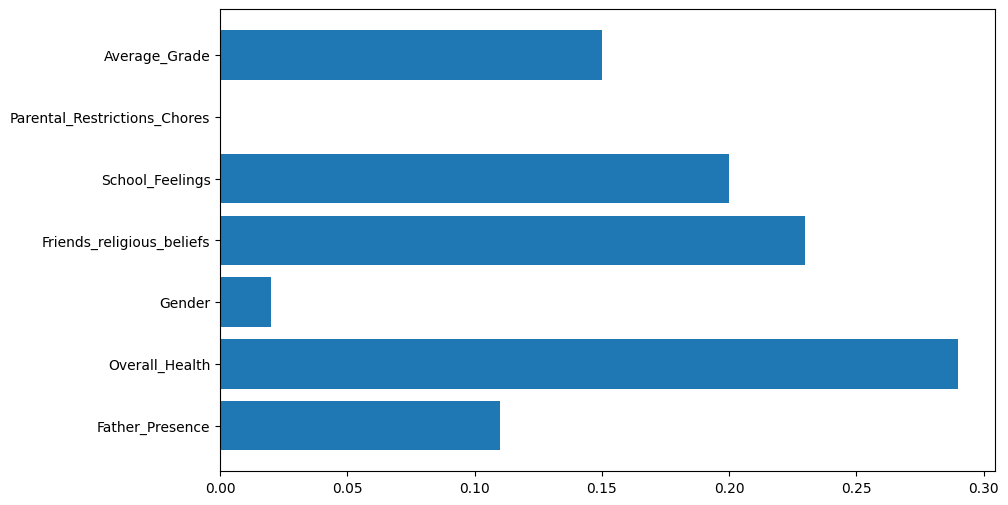

In [24]:
best_model.fit(X_train,y_train) 
importances=best_model.feature_importances_ 
plt.figure(figsize=(10,6)) 
plt.barh(range(len(features)),importances,align="center") 
plt.yticks(range(len(features)),features) 

# Multi-Class Classification

In [25]:
features = ['Father_Presence','Friends_Marijuana_View', 'Overall_Health', 'Gender', 'Friends_religious_beliefs', 'School_Feelings','Parental_Restrictions_Chores','Average_Grade','Argue_with_Parent' ,'Youth_Fight_School','Youth_Sell_Drugs'] 
 
X = d[features] 
y = d['Marijuana_Days_Last_Year'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [26]:
dt_model = DecisionTreeClassifier(random_state=42) 
dt_scores = cross_val_score(dt_model, X, y, cv=5) 
print("\nDecision Tree Cross-validation scores:", dt_scores) 
print("Mean Cross-validation accuracy -Decision Tree:", dt_scores.mean())


Decision Tree Cross-validation scores: [0.86121437 0.86121437 0.84367246 0.85111663 0.84987593]
Mean Cross-validation accuracy -Decision Tree: 0.8534187521716003


## Random Forest Classifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_scores = cross_val_score(rf_model, X, y, cv=5) 
print("Random Forest Cross-validation scores:", rf_scores) 
print("Mean Cross-validation accuracy -Random Forest:", rf_scores.mean()) 

Random Forest Cross-validation scores: [0.87856258 0.88228005 0.85980149 0.86724566 0.86848635]
Mean Cross-validation accuracy -Random Forest: 0.8712752251545872


## Bagging Classifier

In [28]:
base_estimator=DecisionTreeClassifier() 
bagging_model = BaggingClassifier( n_estimators=100, random_state=42) 
bagging_model.fit(X_train,y_train) 
bagging_cv_scores = cross_val_score(bagging_model, X, y, cv=5) 
print("Bagging Cross-validation scores:", bagging_cv_scores) 
print("Mean Cross-validation accuracy -Bagging:", bagging_cv_scores.mean())

Bagging Cross-validation scores: [0.87608426 0.87980173 0.8573201  0.86476427 0.86600496]
Mean Cross-validation accuracy -Bagging: 0.8687950655093


## AdaBoost Classifier

In [31]:
shrinkage_values = [0.1, 0.05,0.025, 0.01] 
best_model = None 
best_accuracy = 0 
for shrinkage in shrinkage_values: 
    boosting_model = AdaBoostClassifier(n_estimators=100, learning_rate=shrinkage, random_state=42)
    cv_scores = cross_val_score(boosting_model, X, y, cv=5)
    mean_accuracy = cv_scores.mean() 
    print("Shrinkage (Learning Rate):", shrinkage) 
    print("Cross-Validation Scores:", cv_scores) 
    print("Mean Accuracy:", mean_accuracy) 
    print() 
    if mean_accuracy > best_accuracy: 
        best_accuracy = mean_accuracy 
        best_model = boosting_model 
print("Best Model:") 
print(best_model) 
print("Best Accuracy:", best_accuracy) 

Shrinkage (Learning Rate): 0.1
Cross-Validation Scores: [0.89343247 0.88847584 0.88833747 0.89081886 0.88957816]
Mean Accuracy: 0.8901285587339072

Shrinkage (Learning Rate): 0.05
Cross-Validation Scores: [0.89219331 0.88723668 0.88833747 0.88957816 0.88957816]
Mean Accuracy: 0.8893847568268962

Shrinkage (Learning Rate): 0.025
Cross-Validation Scores: [0.89343247 0.88723668 0.88833747 0.88957816 0.88957816]
Mean Accuracy: 0.8896325883014933

Shrinkage (Learning Rate): 0.01
Cross-Validation Scores: [0.88847584 0.88971499 0.88957816 0.88957816 0.88957816]
Mean Accuracy: 0.8893850643101151

Best Model:
AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
Best Accuracy: 0.8901285587339072


<BarContainer object of 11 artists>

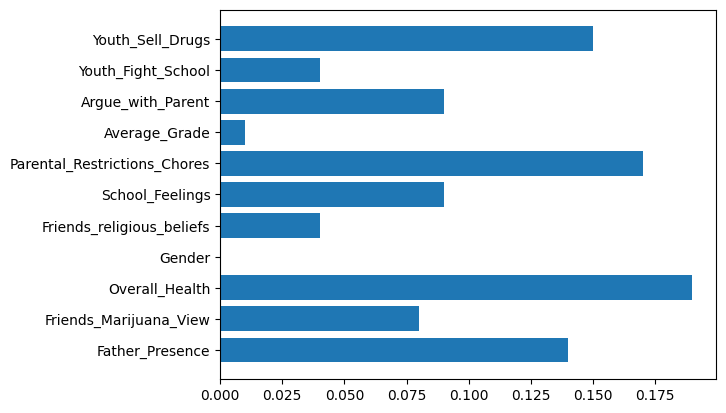

In [32]:
best_model.fit(X,y) 
importances=best_model.feature_importances_ 
plt.barh(features,importances) 

# Regression

In [34]:
features = ['Father_Presence', 'Mother_Presence', 'Parental_Restrictions_Chores','Friends_religious_beliefs', 'Overall_Health', 'School_Feelings', 'Gender', 'Average_Grade','Current_Grade','Students_Using_Marijuana','Youth_Fight_School','Youth_Sell_Drugs','Friends_Marijuana_View'] 
X = d[features] 
y = d['Days_Missed_School'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Decision Tree Regressor

In [38]:
dt_regressor = DecisionTreeRegressor(random_state=42) 
dt_cv_scores = cross_val_score(dt_regressor, X, y, cv=5, scoring='neg_mean_squared_error') 
print("Decision Tree Cross-Validation MSE:", -dt_cv_scores.mean()) 

Decision Tree Cross-Validation MSE: 9.382963470723666


## Random Forest Regressor

In [39]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error') 
print("Random Forest Cross-Validation MSE:", -rf_cv_scores.mean())

Random Forest Cross-Validation MSE: 6.165407807837738


## Bagging Regressor

In [43]:
bagging_regressor = BaggingRegressor(n_estimators=100,random_state=42) 
bagging_cv_scores = cross_val_score(bagging_regressor, X,y,cv=5,scoring='neg_mean_squared_error') 
print("Bagging Cross-Validation MSE:", -bagging_cv_scores.mean())

Bagging Cross-Validation MSE: 6.153744422390844


## Gradient Boosting Regressor

In [47]:
learning_rates=[0.1,0.05,0.25,0.01] 
for i in learning_rates: 
    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=i,random_state=42) 
    gb_cv_scores = cross_val_score(gb_regressor, X, y, cv=5,scoring='neg_mean_squared_error') 
    print("Gradient Boosting Cross-Validation MSE:", -gb_cv_scores.mean(),'for shrinkage value',i)

Gradient Boosting Cross-Validation MSE: 4.781182614236908 for shrinkage value 0.1
Gradient Boosting Cross-Validation MSE: 4.6994025125300665 for shrinkage value 0.05
Gradient Boosting Cross-Validation MSE: 4.990542122814906 for shrinkage value 0.25
Gradient Boosting Cross-Validation MSE: 4.631390239041151 for shrinkage value 0.01


In [48]:
mse_values = { 
"Random Forest": -rf_cv_scores.mean(), 
"Bagging": -bagging_cv_scores.mean(), 
"Gradient Boosting": min(-gb_cv_scores), 
"Decision Tree": min(-dt_cv_scores) 
}

In [49]:
best_model = min(mse_values, key=mse_values.get) 
best_mse = mse_values[best_model] 
print("The Best Model is:", best_model) 
print("MSE of the Best Model is:", best_mse) 
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, random_state=42) 
model.fit(X,y)

The Best Model is: Gradient Boosting
MSE of the Best Model is: 2.9304133092277485


GradientBoostingRegressor(learning_rate=0.05, random_state=42)

([<matplotlib.axis.YTick at 0x26f9fc14550>,
 [Text(0, 0, 'Father_Presence'),
  Text(0, 1, 'Mother_Presence'),
  Text(0, 2, 'Parental_Restrictions_Chores'),
  Text(0, 3, 'Friends_religious_beliefs'),
  Text(0, 4, 'Overall_Health'),
  Text(0, 5, 'School_Feelings'),
  Text(0, 6, 'Gender'),
  Text(0, 7, 'Average_Grade'),
  Text(0, 8, 'Current_Grade'),
  Text(0, 9, 'Students_Using_Marijuana'),
  Text(0, 10, 'Youth_Fight_School'),
  Text(0, 11, 'Youth_Sell_Drugs'),
  Text(0, 12, 'Friends_Marijuana_View')])

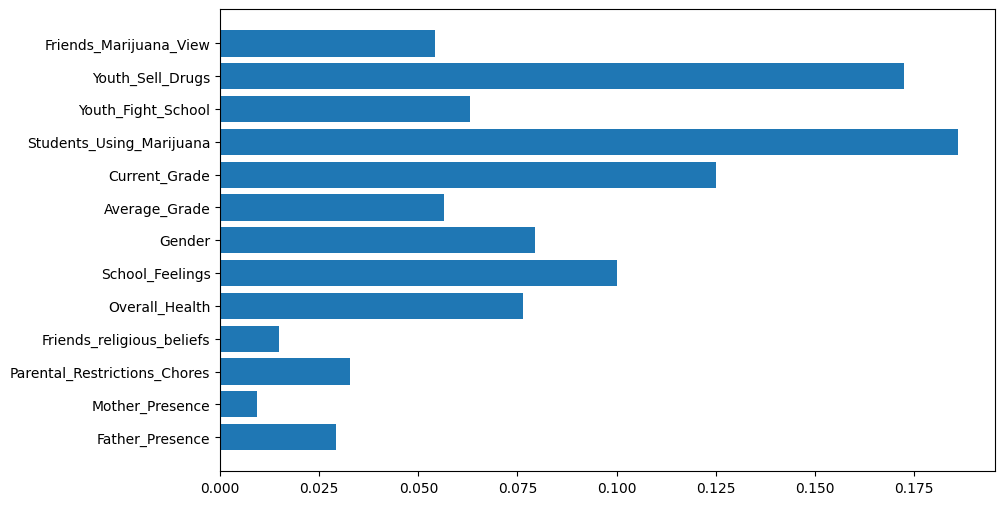

In [53]:
importances=model.feature_importances_ 
plt.figure(figsize=(10,6)) 
plt.barh(range(len(features)),importances,align="center") 
plt.yticks(range(len(features)),features) 


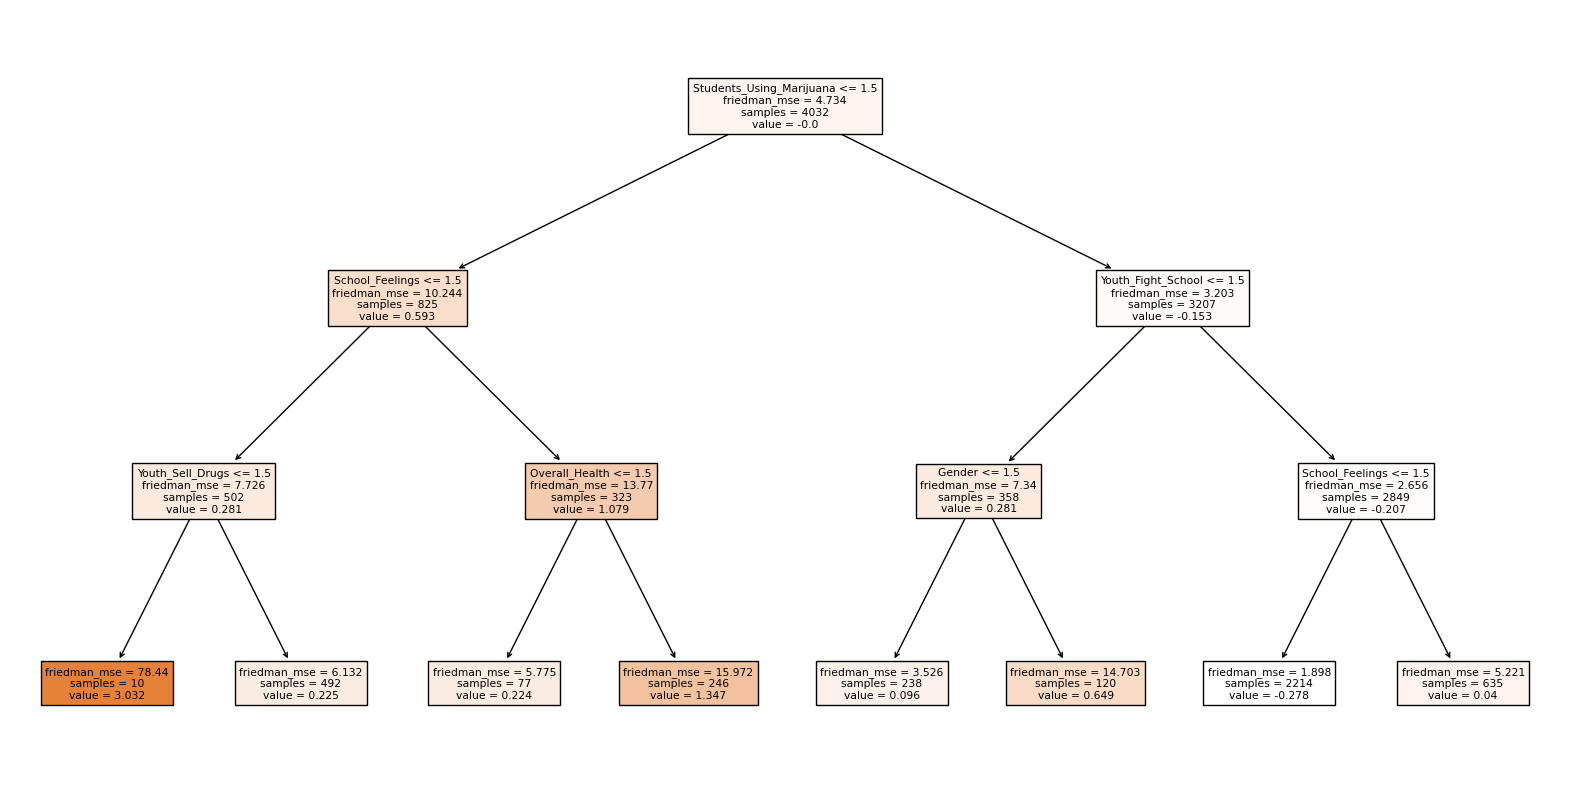

In [51]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20, 10)) 
plot_tree(model.estimators_[0][0], feature_names=features ,filled=True) 
plt.show()

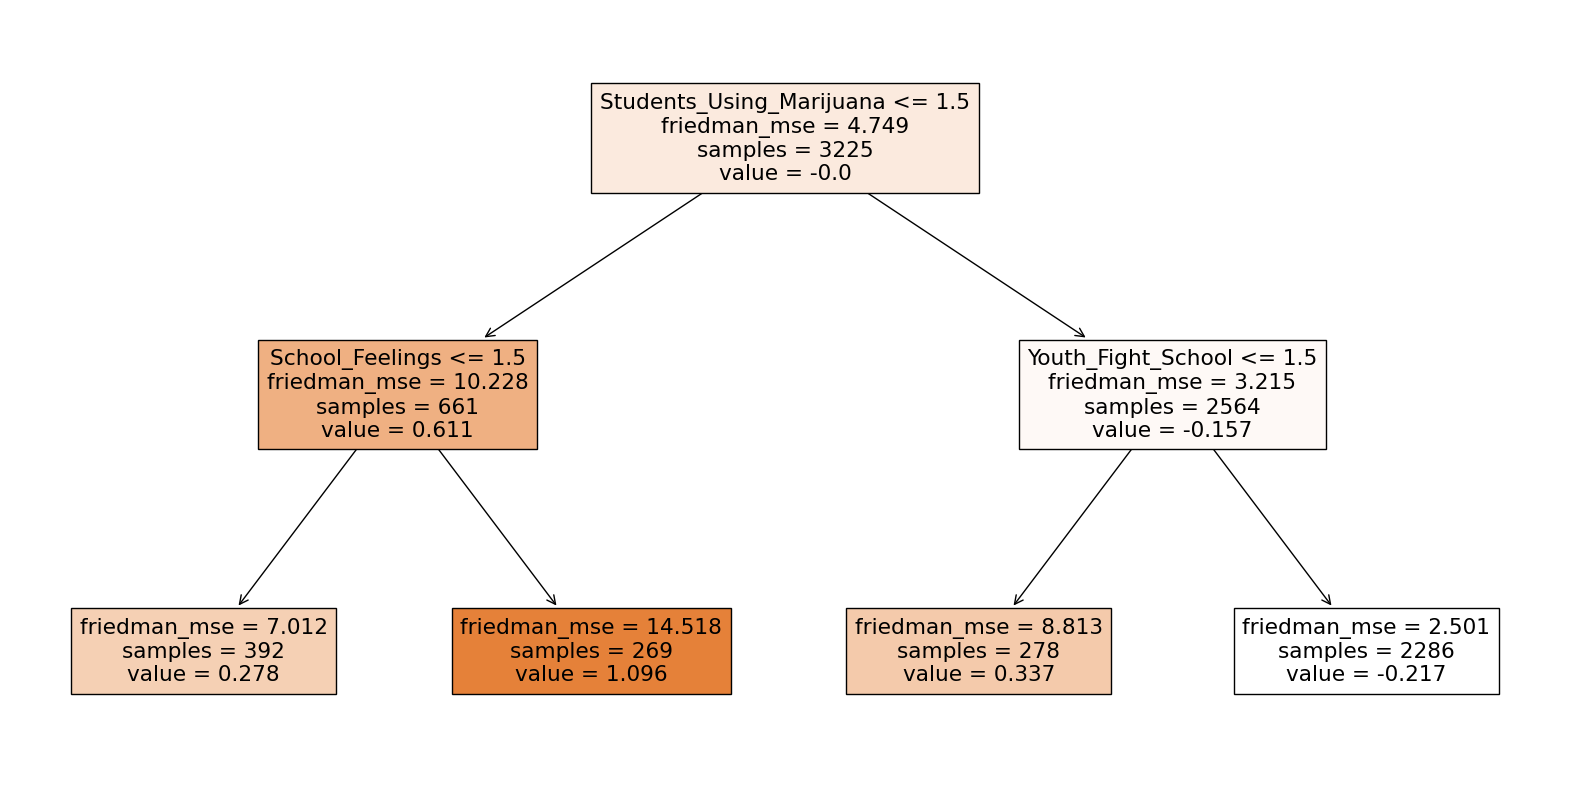

In [52]:
#pruned Tree

gb_regressor_pruned = GradientBoostingRegressor(n_estimators=100,  
max_depth=2,  
min_samples_split=5,  
min_samples_leaf=2,  
random_state=42) 
gb_regressor_pruned.fit(X_train, y_train) 
plt.figure(figsize=(20, 10)) 
plot_tree(gb_regressor_pruned.estimators_[0][0], feature_names=features, filled=True) 
plt.show() 